In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.plots import *
from fastai.conv_learner import *

In [3]:
PATH = Path('data')
imspath = Path('img_align_celeba')
csv_fname = PATH/'list_train.csv'
sz=178
arch=resnext50
bs=80

In [4]:
arch(True)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
  (4): Sequential(
    (0): Sequential(
      (0): LambdaMap(
        (0): Sequential(
          (0): Sequential(
            (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
            (2): ReLU()
            (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
            (5): ReLU()
          )
          (1): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
        )
        (1): Sequential(
          (0): Conv2d(64, 256, kernel

In [4]:
label_csv = pd.read_csv(str(csv_fname))
n = label_csv.shape[0]
val_idxs = get_cv_idxs(n)

In [5]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(str(PATH), str(imspath), str(csv_fname), bs=bs, tfms=tfms, val_idxs=val_idxs, 
                                    skip_header=True)

## Counting ratio of people wearing glasses with thin frames

In [6]:
label_csv['label'].sum() / label_csv.shape[0]

0.18805074077660502

In [6]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5, pretrained=True)

In [7]:
learn.unfreeze()
learn.load('1782')

In [8]:
learn.lr_find()

  0%|          | 0/104 [00:00<?, ?it/s]


KeyboardInterrupt: 

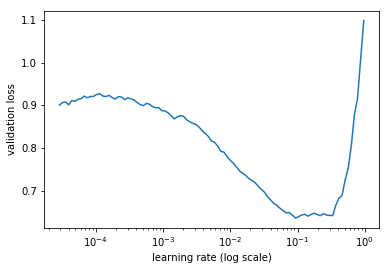

In [44]:
learn.sched.plot()

In [8]:
lr = 5e-2

In [48]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.434612   0.290519   0.86586   
    1      0.410931   0.325032   0.854722                    
    2      0.335994   0.277617   0.863923                    
    3      0.366264   0.313568   0.849395                    
    4      0.336255   0.304176   0.851332                    
    5      0.287695   0.273124   0.86586                     
    6      0.275369   0.270949   0.869734                    



[array([0.27095]), 0.8697336562320626]

In [10]:
learn.unfreeze()
lr /= 2

In [15]:
learn.sched.plot_loss()

AttributeError: 'NoneType' object has no attribute 'plot_loss'

In [51]:
learn.save(f'{sz}')

In [11]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

  7%|▋         | 7/104 [00:16<03:54,  2.42s/it, loss=0.176]

KeyboardInterrupt: 

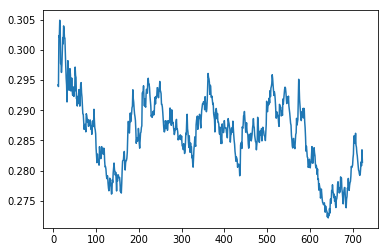

In [11]:
learn.sched.plot_loss()
learn.save(f'{sz}')

In [71]:
learn.save(f'{sz}2')

In [9]:
lr = 5e-2
lr /= 5

In [10]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.281562   0.262813   0.874092  
    1      0.292866   0.262925   0.873123                    
    2      0.28823    0.263075   0.870218                    
    3      0.286003   0.264716   0.873608                    
    4      0.290548   0.263958   0.874576                    
    5      0.277028   0.262969   0.877966                    
    6      0.282296   0.261765   0.871186                    



[array([0.26176]), 0.8711864366658375]

# Test

In [9]:
trn_tfms, val_tfms = tfms

In [21]:
test_im = open_image('data/test_img/3.jpg')
test_im_norm = val_tfms(test_im)

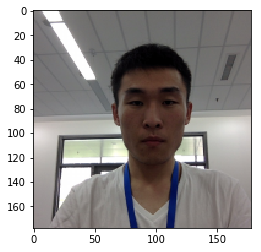

In [22]:
plt.imshow(data.val_ds.denorm(test_im_norm)[0])

In [23]:
np.exp(learn.predict_array(test_im_norm[None]))

array([[0.62513, 0.37487]], dtype=float32)

In [109]:
test_im = data.val_dl.get_batch([0])[0]

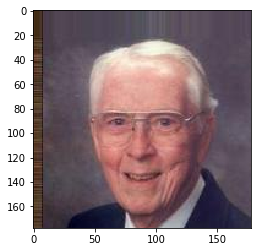

In [113]:
plt.imshow(data.val_ds.denorm(test_im)[0])

In [133]:
np.exp(learn.predict_array(data.val_dl.get_batch(range(30, 50))[0]))

array([[0.99564, 0.00436],
       [0.53523, 0.46477],
       [0.76795, 0.23205],
       [0.97628, 0.02372],
       [0.91202, 0.08798],
       [0.41506, 0.58494],
       [0.99746, 0.00254],
       [0.98041, 0.01959],
       [0.97282, 0.02718],
       [0.99994, 0.00006],
       [0.83302, 0.16698],
       [0.99964, 0.00036],
       [0.85883, 0.14117],
       [0.99899, 0.00101],
       [0.94976, 0.05024],
       [0.99854, 0.00146],
       [0.99185, 0.00815],
       [0.99873, 0.00127],
       [0.99999, 0.00001],
       [0.99991, 0.00009]], dtype=float32)

In [132]:
data.val_ds.y[30:50]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

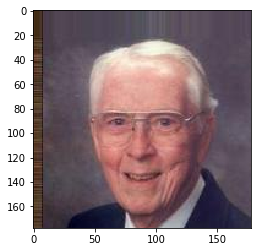

In [98]:
plt.imshow(data.val_ds.denorm(data.val_dl.get_batch([0])[0])[0])

In [100]:
log_preds,y = learn.TTA()

In [102]:
preds = np.mean(np.exp(log_preds),0)

In [147]:
preds.shape, np.sum(preds[:,0] > 0.5)

((2065, 2), 1751)

## Test on celeba without glasses

### Searching for ratio

In [14]:
trn_tfms, val_tfms = tfms

In [15]:
csv_no_glasses = pd.read_csv(str(PATH/'no_glasses_index.csv')).set_index('image_id')[:3000]

In [16]:
csv_no_glasses.shape

(3000, 0)

In [46]:
num_preds = bs * 25
preds = np.empty([num_preds])
for i in np.arange(0, num_preds, bs):
    test_ims_no_glasses = np.array([open_image(str(PATH/imspath/o)) for o in csv_no_glasses.index[i:i+bs]])
    test_ims_no_glasses = np.array([val_tfms(o) for o in test_ims_no_glasses])
    preds[i:i+bs] = np.exp(learn.predict_array(test_ims_no_glasses)[:,1])

In [47]:
ratio = []
x = np.linspace(0, 1, 51)
for i, th in enumerate(x):
    ratio.append((preds>th).sum() / num_preds)

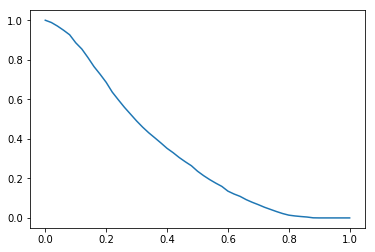

In [48]:
plt.plot(x, ratio)

In [54]:
np.where(np.array(ratio) < 0.188)[0][0] / 51

0.5490196078431373

In [11]:
test_ims_no_glasses = np.array([open_image(str(PATH/imspath/o)) for o in csv_no_glasses.index[:10]])

In [15]:
test_ims_no_glasses = np.array([val_tfms(o) for o in test_ims_no_glasses])

In [16]:
np.exp(learn.predict_array(test_ims_no_glasses))

array([[0.80412, 0.19588],
       [0.5498 , 0.4502 ],
       [0.89118, 0.10882],
       [0.93415, 0.06585],
       [0.78133, 0.21867],
       [0.91033, 0.08967],
       [0.50784, 0.49216],
       [0.31912, 0.68088],
       [0.83178, 0.16822],
       [0.7074 , 0.2926 ]], dtype=float32)